# Nome Completo - Turma:


# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
#!pip install psycopg2-binary
#!pip install seaborn
#!pip install pandas

### Importando bibliotecas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [ ]:
conn = psycopg2.connect(host="salt.db.elephantsql.com",
                        database="cjfoaebt", 
                        user="cjfoaebt", 
                        password="A9LnC0XfqQfBz_doMpfq5svSSSBFxnNN")

In [ ]:
conn

<connection object at 0x7f77c2c0f2f0; dsn: 'user=cjfoaebt password=xxx dbname=cjfoaebt host=salt.db.elephantsql.com', closed: 0>

#Minimundo

O sistema proposto para a "Devcom Projetos conterá as informacões aqui detalhadas. Dos Projetos serão armazenados o número, nome e cidade. Dos Departamentos serão armazenados o número e nome. O cliente destacou que cada projeto pode ter vários departamentos auxiliando no seu desenvolvimento, e cada departamento pode estar envolvido em vários projetos. Os dados relativos aos empregados que serão armazenados são: rg, nome, cpf, salário, data inicial do salario e supervisor de cada empregado. É importante destacar que cada empregado pode ser supervisionado por outro empregado, e obrigatoriamente deve estar alocado a um único departamento, mas pode gerenciar vários departamentos ou não gerenciar nenhum. Um empregado também pode participar de vários projetos, caso seja necessário, mas não precisa obrigatoriamente estar alocado em algum projeto. Com relação aos dependentes serão armazenadas as informações de nome do dependente, data de nascimento, sexo e grau de parentesco. Cada empregado pode ter vários dependentes, mas um dependente esta associado apenas a um único empregado. Com relação ao histórico de salário devemos armazenar as informações de valor do salário, data de início do salário no período e data final do salário no período. É importante lembrar que cada funcionario pode ter diversos eventos de histórico de salário associados a ele visto que este dado pode ser alterado várias vezes.

# Modelo lógico do trabalho

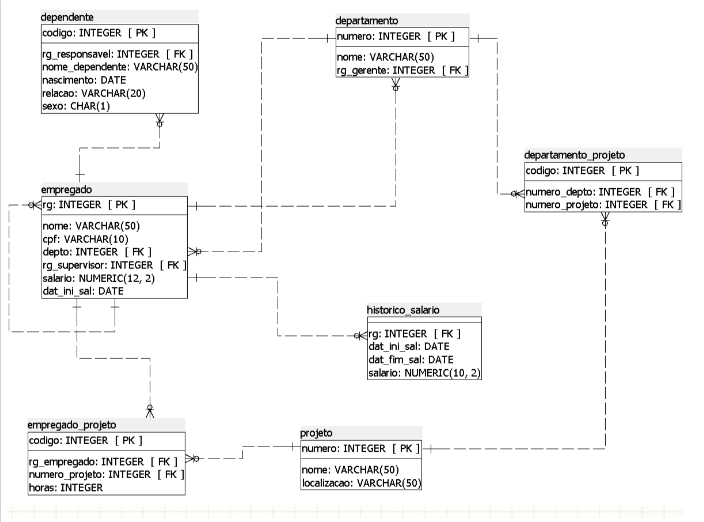

# Modelo físico e Inserts
###Enviar juntamente com o link deste colab o arquivo sql no ava (incluindo creates table + inserts)
##### Exemplo: https://raw.githubusercontent.com/discipbdint/public_samples/main/example_of_physical_model.sql

# Select das tabelas (Cada uma)

In [ ]:
res = pd.read_sql_query("""select * from empregado """,conn)
res

,rg,nome,cpf,depto,rg_supervisor,salario,dat_ini_sal
0,1010,João Luiz,11111,1,NaN,6000.0,2011-05-01
1,2020,Fernanda,22222,1,1010.0,5500.0,2008-12-01
2,3030,Ricardo,33333,2,2020.0,2300.0,2009-08-01
3,4040,Jorge,44444,2,3030.0,3200.0,2010-10-01
4,5050,Renata,55555,2,3030.0,1300.0,2012-02-01
5,6060,Luiz Renato,66666,3,2020.0,3000.0,2012-05-01
6,7070,Luiz Fernando,77777,3,6060.0,2000.0,2008-08-01
7,8080,João Antonio,88888,1,2020.0,3950.0,2010-07-01


In [ ]:
res = pd.read_sql_query("""select * from departamento """,conn)
res

,numero,nome,rg_gerente
0,4,Industrial,NaN
1,1,Contabilidade,1010.0
2,2,Engenharia Civil,3030.0
3,3,Engenharia Mecânica,2020.0


## OBS: Incluir todas as outras tabelas do seu banco

# Relatórios

## Desenvolver ao menos 5 relatórios que possuam informações relavantes obtidos a partir do sistema/banco de dados proposto

## Relatório 1
### Objetivo: Obter relatório que mostre o codigo cada supervisor(a) e a quantidade de empregados supervisionados em relacao ao código.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                            select rg_supervisor, 
                            count(rg_supervisor) as qtd_supervisionados
                            from empregado as e 
                            where rg_supervisor is not null
                            group by e.rg_supervisor
                            """,conn)


In [ ]:
res

,rg_supervisor,qtd_supervisionados
0,3030,2
1,6060,1
2,2020,3
3,1010,1


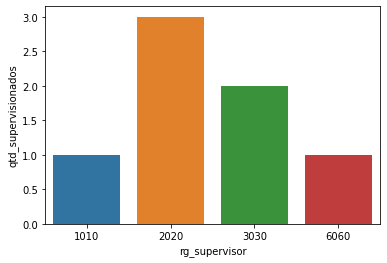

In [ ]:
sns.barplot(x='rg_supervisor',
            y='qtd_supervisionados',
            data=res)

# ==========================================================================================
## Relatório 2 
### Objetivo: Agrupe os dependentes por tipo de relação, mostrando somente o atributo relação e a quantidade de dependentes com a referida relação.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""SELECT relacao,count(relacao) as qtd_relacao
from dependente
group by relacao 
                            """,conn)
res

,relacao,qtd_relacao
0,Cônjuge,2
1,Filho,4
2,Filha,1


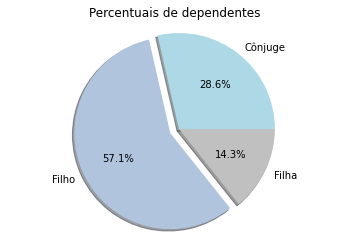

In [ ]:
my_data = res['qtd_relacao']
my_labels = res['relacao']
my_colors = ['lightblue', 'lightsteelblue', 'silver']
my_explode = (0, 0.1, 0)
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', shadow=True, colors=my_colors, explode=my_explode)
plt.title('Percentuais de dependentes')
plt.axis('equal')
plt.show()


# ============================================================
## Relatório 3 
### Objetivo: Mostrar para cada empregado o seu nome e a soma total da quantidade de horas alocadas incluindo todos os projetos na qual é participante. O Resultado deve ser apresentado em ordem decrescente relativa ao que tema maior quantidade de horas alocada para o que possui menor quantidade.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                  SELECT  e.nome,sum(ep.horas) as qtd_total_horas_em_projetos
from empregado e
inner join empregado_projeto ep
on ep.rg_empregado=e.rg
inner join projeto p
on ep.numero_projeto = p.numero
group by e.nome
order by qtd_total_horas_em_projetos desc
                  """,conn)
res

,nome,qtd_total_horas_em_projetos
0,João Antonio,70
1,Jorge,50
2,Fernanda,35
3,Renata,35
4,Ricardo,35


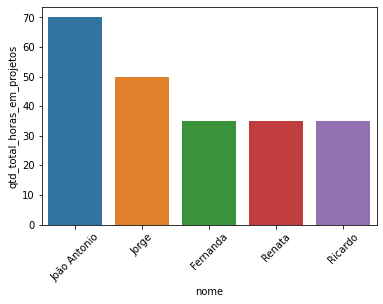

In [ ]:
plt.xticks(rotation=45)
sns.barplot(x='nome',y='qtd_total_horas_em_projetos',data=res,)

# ============================================================
## Relatório 4 
### Objetivo: Mostrar o nome do departamento e a quantidade de funcionários alocados a cada departamento.

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                          select d.nome,count(e.nome) as qtd_alocados_depto
                            from departamento d 
                            inner join empregado e 
                            on e.depto = d.numero 
                            group by d.nome
""",conn)
res

,nome,qtd_alocados_depto
0,Engenharia Civil,3
1,Engenharia Mecânica,2
2,Contabilidade,3


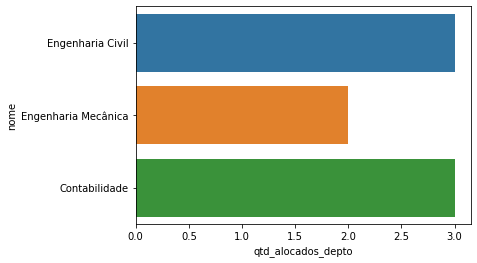

In [ ]:
sns.barplot(y='nome',x='qtd_alocados_depto',data=res)

# ============================================================
## Relatório 5
### Objetivo: Mostre o nome do departamento e a soma total dos salários dos empregados por departamento.
Código para obtenção do resultado:


In [ ]:
res = pd.read_sql_query("""
                           select d.nome,sum(e.salario) as total_salario_depto
 from departamento d 
inner join empregado e 
on e.depto = d.numero 
group by d.nome
                            """,conn)
res

,nome,total_salario_depto
0,Engenharia Civil,6800.0
1,Engenharia Mecânica,5000.0
2,Contabilidade,15450.0


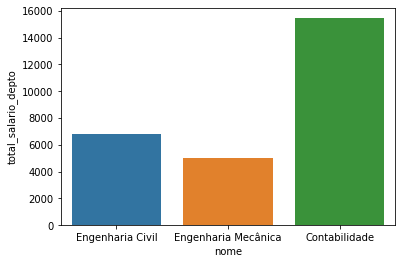

In [ ]:
sns.barplot(x='nome',y='total_salario_depto', data=res)

# ============================================================
## Relatório 6
### Objetivo: Obter os nomes dos empregados, departamento e salário e apresentar um gráfico que possibilite analisar os salarios em função dos salários obtidos.
==>(Importante: ao escolhar o gráfico, verifique se ele é perfeitamente compreensível e se trás informações relevantes)

Código para obtenção do resultado:


In [ ]:
res = pd.read_sql_query("""
                  select emp.nome,dep.nome as departamento,salario
                      from empregado emp 
                            inner join departamento dep
                            on (emp.depto = dep.numero)
                            order by departamento,salario desc""",conn)
res

,nome,departamento,salario
0,João Luiz,Contabilidade,6000.0
1,Fernanda,Contabilidade,5500.0
2,João Antonio,Contabilidade,3950.0
3,Jorge,Engenharia Civil,3200.0
4,Ricardo,Engenharia Civil,2300.0
5,Renata,Engenharia Civil,1300.0
6,Luiz Renato,Engenharia Mecânica,3000.0
7,Luiz Fernando,Engenharia Mecânica,2000.0


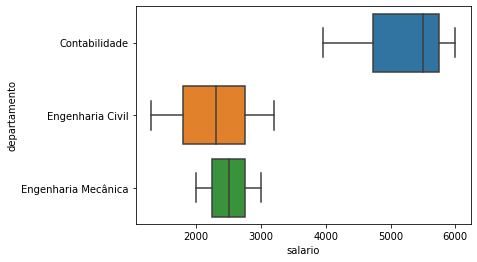

In [ ]:
sns.boxplot(y="departamento", x="salario", data=res)

# Explicação do Gráfico

Análise do Gráfico
A Mediana (Md) representa o valor central de um conjunto de dados. Para encontrar o valor da mediana é necessário colocar os valores em ordem crescente ou decrescente.

Quando o número elementos de um conjunto é par, a mediana é encontrada pela média dos dois valores centrais. Assim, esses valores são somados e divididos por dois.


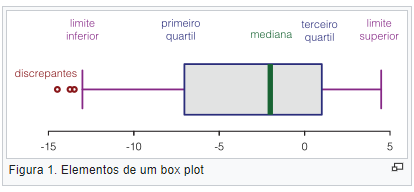

In [ ]:
conn.close() 